In [1]:
library("ggplot2")
library("dplyr",warn.conflicts=FALSE)
set.seed(1234)

## R exercises
# Set n# 5

### Exercise 1

the number of particles emitted by a radioactive source during a fixed interval of time ($∆t = 10 s$) follows a Poisson distribution on the parameter $\mu$:

$$
P(r|\mu) = \frac{\mu^r}{r!}e^{-\mu}
$$

The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

#### a) suppose a uniform prior distribution for the parameter μ
- determine and draw the posterior distribution for μ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

In the case of a flat prior, the posterior is simply proportional to the likelihood:

$$
P(\mu|\boldsymbol{y}) \propto P(\boldsymbol{y}|\mu) = \prod_i^N \frac{\mu^{y_i}}{y_i!} e^{-\mu} = \frac{\mu^{\sum_i y_i}}{\prod_i y_i!} e^{-N\mu}
$$

Where the vector $\boldsymbol{y}=(y_1,y_2,...,y_N)$ is the vector holding the observations. The distribution $P(\mu | \boldsymbol{y})$ is a Gamma distribution function: 

$$
Gamma(y|\alpha,\lambda)=ky^{\alpha-1}e^{-\lambda y} \\ 
k = \lambda^{\alpha}/\Gamma(\alpha)
$$ 


$$
P(\mu|\boldsymbol{y}) = Gamma(\mu|\sum_i y_i +1,N)
$$


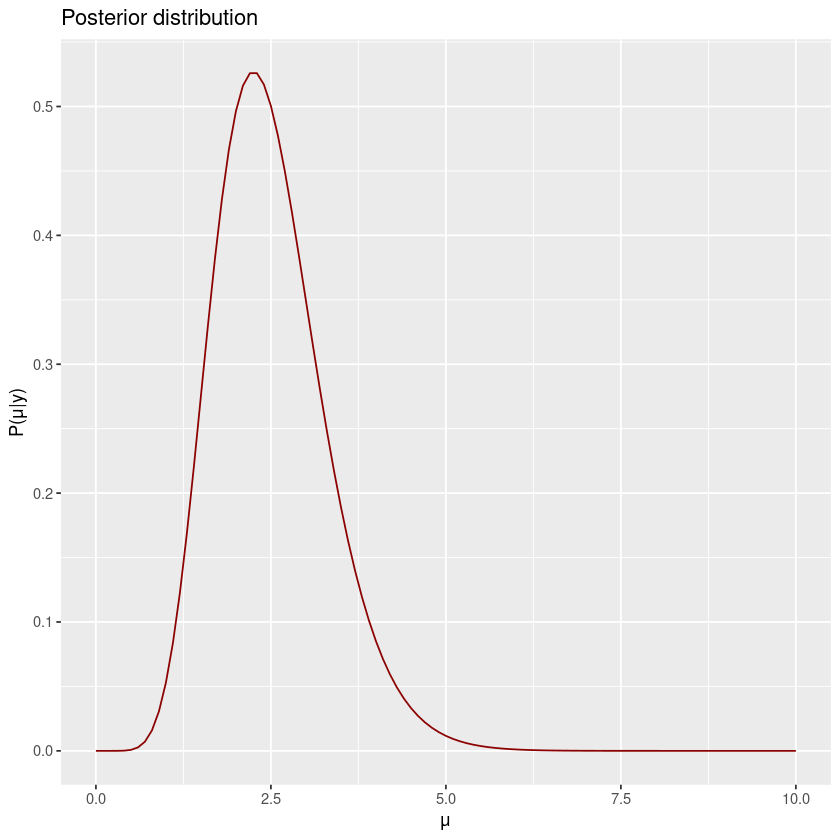

In [2]:
y <- c(4,1,3,1) # observations
alpha <- sum(y) + 1
lambda <- length(y) 

plot <- ggplot() + geom_function(fun=dgamma,args=c(alpha,lambda),color="darkred") + xlim(0,10) + labs(x="μ",y="P(μ|y)",title="Posterior distribution")

plot

The mean of the distribution is the mean of a gamma distribution, that can be evaluated analytically as $\alpha / \lambda$.
It can also be computed numerically by performing the integration

$$
\int_0^{\infty} \mu \; P(\mu|\boldsymbol{y}) d\mu
$$

We can compute this by extracting random numbers from the distribution and calculating the mean:

In [3]:
mean_an <- alpha/lambda
N <- 1000
mean_num <- sum(rgamma(N,alpha,lambda))/N

print(mean_an)
print(mean_num)

[1] 2.5
[1] 2.514101


The same goes for the variance (known analytically to be $\alpha/\lambda^2$), that can be calculated as the variance of sampled points.

In [4]:
var_an <- alpha/(lambda^2)
var_num <- var(rgamma(N,alpha,lambda))

print(var_an)
print(var_num)

[1] 0.625
[1] 0.5889622


The median $\mu_m$, whose analytical expression would solve the CDF problem $\int_{-\infty}^{\mu_m} P(\mu|\boldsymbol{y}) d\mu$ = 1/2, has no known closed form. The numerical approximation provided by R in calculating the quantile function will result in:

In [5]:
med_num <- qgamma(0.5,alpha,lambda)

#### b) suppose a Jeffrey’s prior for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

The Jeffrey's prior means a prior distribution on the parameter $\mu$ like
$$
P(\mu) \propto \frac{1}{\sqrt{\mu}}
$$

This results in the following posterior distribution for the parameter $\mu$:

$$
P(\mu | \boldsymbol{y}) \propto \mu^{\sum_i y_i -1/2}e^{-N\mu}
$$

Which is again a gamma distribution, but now $\alpha = \sum_i y_i +\frac{1}{2}$. We can repeat the previous steps:

In [6]:
alpha_jef <- alpha - 0.5 

mean_an <- alpha_jef/lambda
mean_num <- sum(rgamma(N,alpha_jef,lambda))/N

var_an <- alpha_jef/(lambda^2)
var_num <- var(rgamma(N,alpha_jef,lambda))

med_num <- qgamma(0.5,alpha_jef,lambda)

df <- data.frame(mean_an=mean_an,mean_num=mean_num,var_an=var_an,var_num=var_num,med_num=med_num)
df

mean_an,mean_num,var_an,var_num,med_num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.375,2.396108,0.59375,0.5629066,2.292207


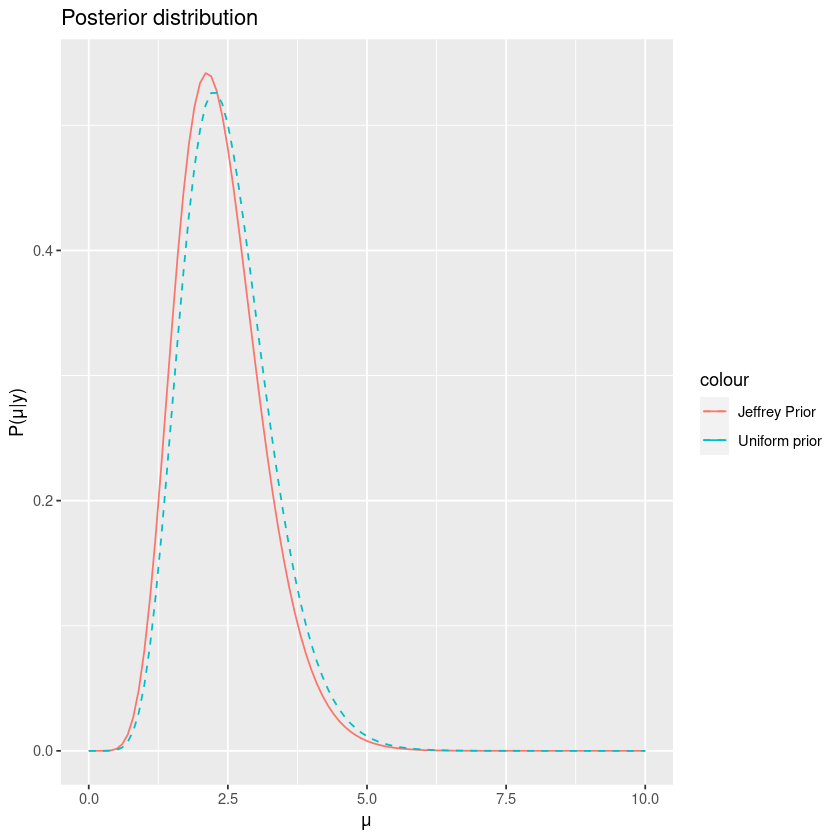

In [9]:
plot <- ggplot() + geom_function(fun=dgamma,args=c(alpha_jef,lambda),aes(col="Jeffrey Prior")) + xlim(0,10) + labs(x="μ",y="P(μ|y)",title="Posterior distribution")
plot <- plot + geom_function(fun=dgamma,args=c(alpha,lambda),aes(col='Uniform prior'),linetype='dashed')
plot

#### c) 
_evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation_

If the distribution was symmetric, we could simply evaluate the tails corresponding to 2.5% probability each. But, in skewed distributions such as this one, this doesn't always produce the smallest interval $\mu_2 - \mu_1$, so we will do a step research, by letting $\mu_1$ vary from 0% to 5% probability (this fixes $\mu_2$) and choose the smaller one.

Let's start with the uniform prior:

[1] "Best m1 found:"
[1] 1.07625
[1] "Corresponding to tail probability:"
[1] 0.013
[1] "Best m2 found:"
[1] 4.079166
[1] "Corresponding to tail probability:"
[1] 0.037


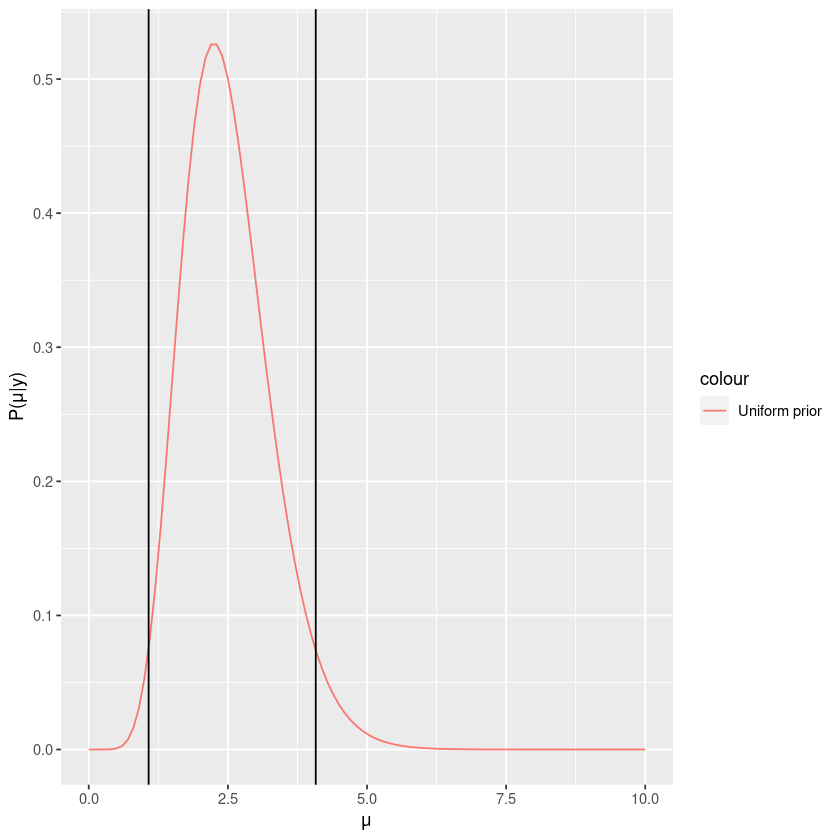

In [21]:
best_diff <- 1e10
for (p1 in seq(0,0.05,0.001)) {
    m1 <- qgamma(p1,alpha,lambda)
    m2 <- qgamma(1-(0.05-p1),alpha,lambda)
    if (abs(m2-m1)< best_diff) {
        best_diff <- abs(m2-m1)
        best_m1 <- m1
        best_m2 <- m2
    }
}

print("Best m1 found:")
print(best_m1)
print("Corresponding to tail probability:")
print(pgamma(best_m1,alpha,lambda))
print("Best m2 found:")
print(best_m2)
print("Corresponding to tail probability:")
print(1-pgamma(best_m2,alpha,lambda))

plot <- ggplot() + geom_function(fun=dgamma,args=c(alpha,lambda),aes(col='Uniform prior')) + xlim(0,10) + geom_vline(xintercept=best_m1) + labs(x="μ",y="P(μ|y)") + geom_vline(xintercept=best_m2)
plot

Now with the Jeffrey prior:

[1] "Best m1 found:"
[1] 0.9828356
[1] "Corresponding to tail probability:"
[1] 0.012
[1] "Best m2 found:"
[1] 3.904872
[1] "Corresponding to tail probability:"
[1] 0.038


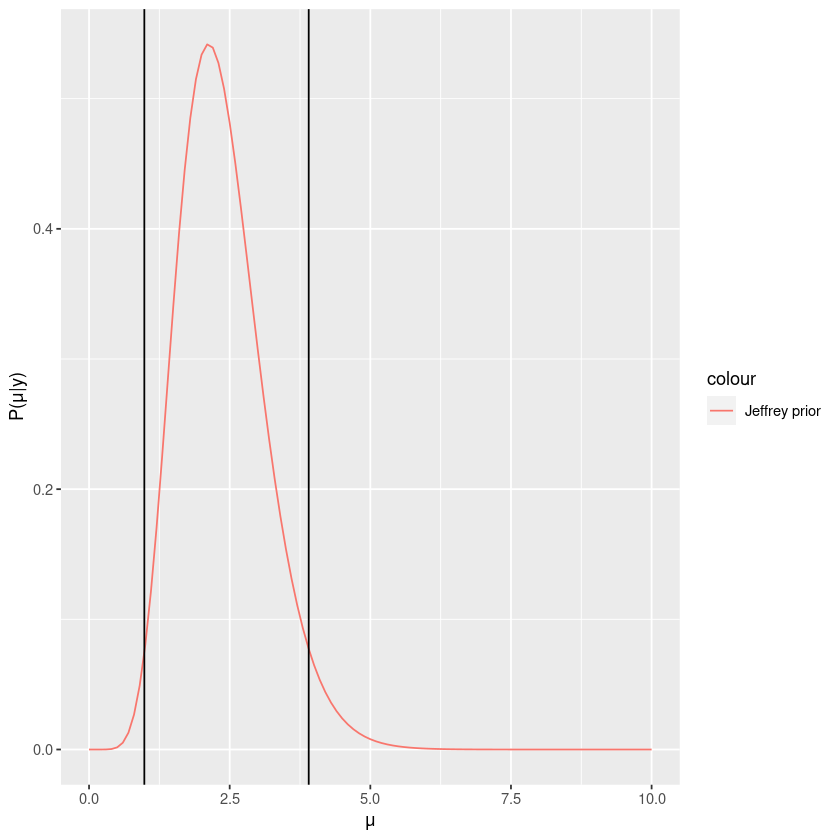

In [23]:
best_diff <- 1e10
for (p1 in seq(0,0.05,0.001)) {
    m1 <- qgamma(p1,alpha_jef,lambda)
    m2 <- qgamma(1-(0.05-p1),alpha_jef,lambda)
    if (abs(m2-m1)< best_diff) {
        best_diff <- abs(m2-m1)
        best_m1 <- m1
        best_m2 <- m2
    }
}

print("Best m1 found:")
print(best_m1)
print("Corresponding to tail probability:")
print(pgamma(best_m1,alpha_jef,lambda))
print("Best m2 found:")
print(best_m2)
print("Corresponding to tail probability:")
print(1-pgamma(best_m2,alpha_jef,lambda))

plot <- ggplot() + geom_function(fun=dgamma,args=c(alpha_jef,lambda),aes(col='Jeffrey prior')) + xlim(0,10) + geom_vline(xintercept=best_m1) + labs(x="μ",y="P(μ|y)") + geom_vline(xintercept=best_m2)
plot

Let us now evaluate the same quantities but from a gaussian with same mean and standard deviation. Since the distribution is symmetric, we can now compute the values by cutting off the tails at 2.5% probability each.

In [24]:
df_norm <- data.frame(
    m1_uni=qnorm(0.025,alpha/lambda,(alpha^0.5)/lambda),
    m2_uni=qnorm(0.975,alpha/lambda,(alpha^0.5)/lambda),
    m1_jef=qnorm(0.025,alpha_jef/lambda,(alpha^0.5)/lambda),
    m2_jef=qnorm(0.975,alpha_jef/lambda,(alpha^0.5)/lambda)
    )

df_norm

m1_uni,m2_uni,m1_jef,m2_jef
<dbl>,<dbl>,<dbl>,<dbl>
0.9505124,4.049488,0.8255124,3.924488


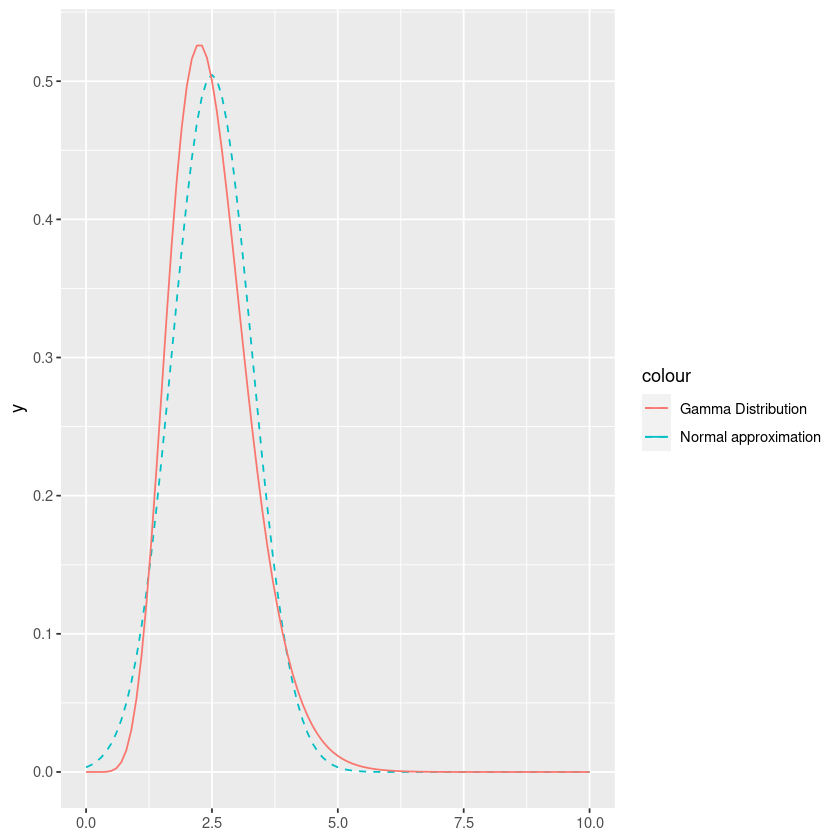

In [25]:
plot <- ggplot() + geom_function(fun=dnorm,args=c(alpha/lambda,(alpha^0.5)/lambda),aes(col="Normal approximation"),linetype='dashed') + xlim(0,10)
plot <- plot + geom_function(fun=dgamma,args=c(alpha,lambda),aes(col='Gamma Distribution'))
plot

### Exercise 2

_given the problem of the lighthouse discussed last week, study the case in which both  the position along the shore (α) and the distance Parameter out at sea (β) are unknown_

<img src="lighthouse.png" width=400>

Let's build up the problem as done in class. First, assume a uniform likelihood distribution on the angle of emission: $\theta_k \sim \mathcal{U}(-\pi/2,\pi/2)=\tfrac{1}{\pi}$.
Then, we establish the relation between the angle of emission and the coast location: $x_k - \alpha = \beta \tan (\theta_k)$. Applying the transformation, the likelihood of $x_k$ becomes
$$
P(x|\alpha,\beta) = P(\theta|\alpha,\beta) \left | \frac{d \theta}{d x} \right | = \frac{1}{\pi} \frac{\beta}{\beta^2 + (x-\alpha)^2}
$$

Now, we need to assign a prior distribution, this time on both $\alpha$ and $\beta$. We believe that knowing one of them tells us nothing about the other value, so we assume $P(\alpha,\beta) = P(\alpha)P(\beta)$; we then assume that we don't know anything about the location of the lightouse expect that it lies within some range of interest. That is why we assign a uniform prior distribution for both parameters:

$$
P(\alpha,\beta) = 
\begin{cases}
\frac{1}{\alpha_{max} - \alpha_{max}}\frac{1}{\beta_{max} - \beta_{max}} \;\;\; & \forall (\alpha,\beta) \in [\alpha_{min},\alpha_{max}] \times [\beta_{min},\beta_{max}] \\
0 & otherwise
\end{cases}
$$

Combining with the likelihood of observing a vector of distances $\boldsymbol{x}$, which is simply the product of the probability of independend observations, we have

$$
P(\alpha,\beta|\boldsymbol{x}) = \prod_i^N P(x_i|\alpha,\beta) P(\alpha,\beta) = \frac{1}{\alpha_{max} - \alpha_{max}}\frac{1}{\beta_{max} - \beta_{max}} \prod_i^N \frac{1}{\pi} \frac{\beta}{\beta^2 + (x_i-\alpha)^2}
$$
If we consider the logarithm of such distribution:

$$
\ln (P(\alpha,\beta|\boldsymbol{x})) = \ln \left ( \frac{1}{\pi} \frac{1}{\alpha_{max} - \alpha_{max}}\frac{1}{\beta_{max} - \beta_{max}} \right ) + \sum_i^N \ln \left (  \frac{\beta}{\beta^2 + (x_i-\alpha)^2}\right )
$$

Let us now sample some data from a known "lighthouse", i.e. we set $\alpha = 1$ and $\beta = 2$, and plot the posterior distribution as a function of the collected data.

Warning message:
“Removed 278 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


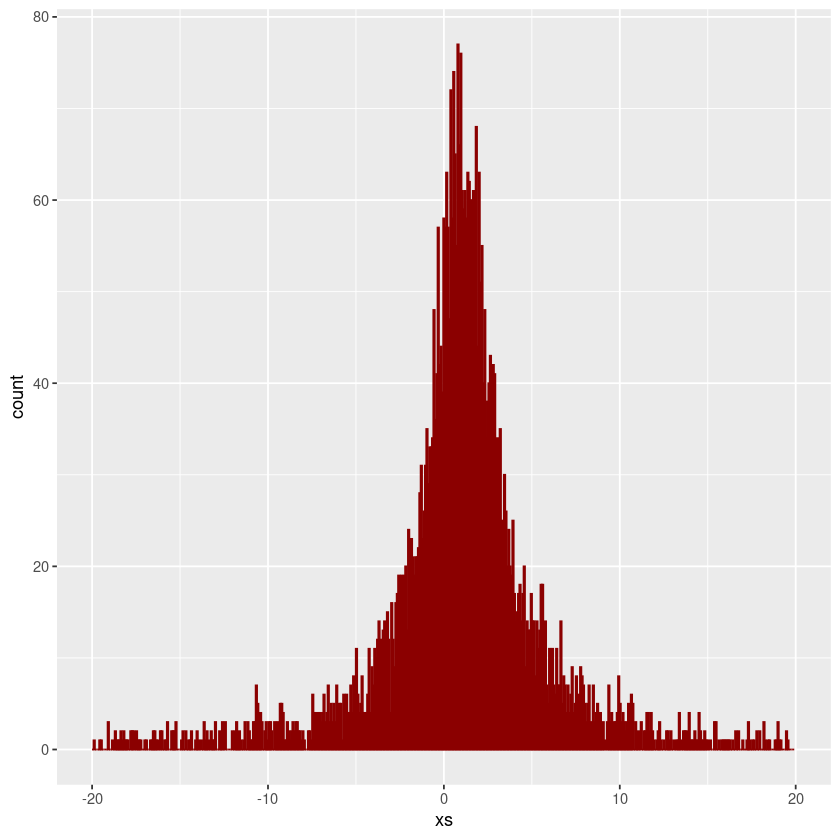

In [12]:
alpha <- 1
beta <- 2

Nobs <- 5000

thetas <- runif(Nobs,-pi/2,pi/2)

xs <- alpha + beta*tan(thetas)

df <- data.frame(thetas=thetas,xs=xs)

plot <- ggplot(data=df,aes(x=xs)) + geom_histogram(bins=500,color='darkred') + xlim(-20,20)
plot



We can now plot the posterior distribution for various observations and see how its shape evolves with the growing number of observations: the peak gets higher and higher (the colorbar spans a larger range)

In [13]:
# posterior distribution after a vector x of observations

log_posterior <- function (a,b,x,amax,amin,bmax,bmin) {

  return(case_when(
    a>amax | a<amin | b>bmax | b<bmin ~ 0,
    a <= amax & a >= amin & b<=bmax & b>=bmin  ~ -log(pi*(bmax-bmin)*(amax-amin)) + sum(log( b/(b^2 + (x-a)^2)  ))  
      
      ))
    
}

amax <- 10
amin <- -10

bmax <- 10
bmin <- 0

as <- seq(amin,amax,0.1)
bs <- seq(bmin,bmax,0.1)

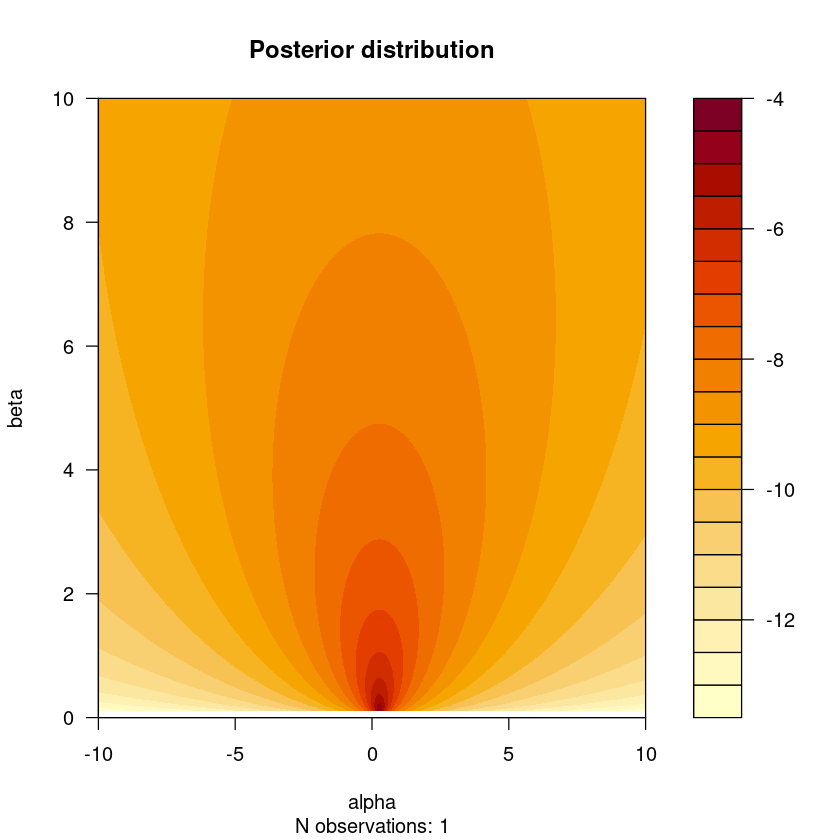

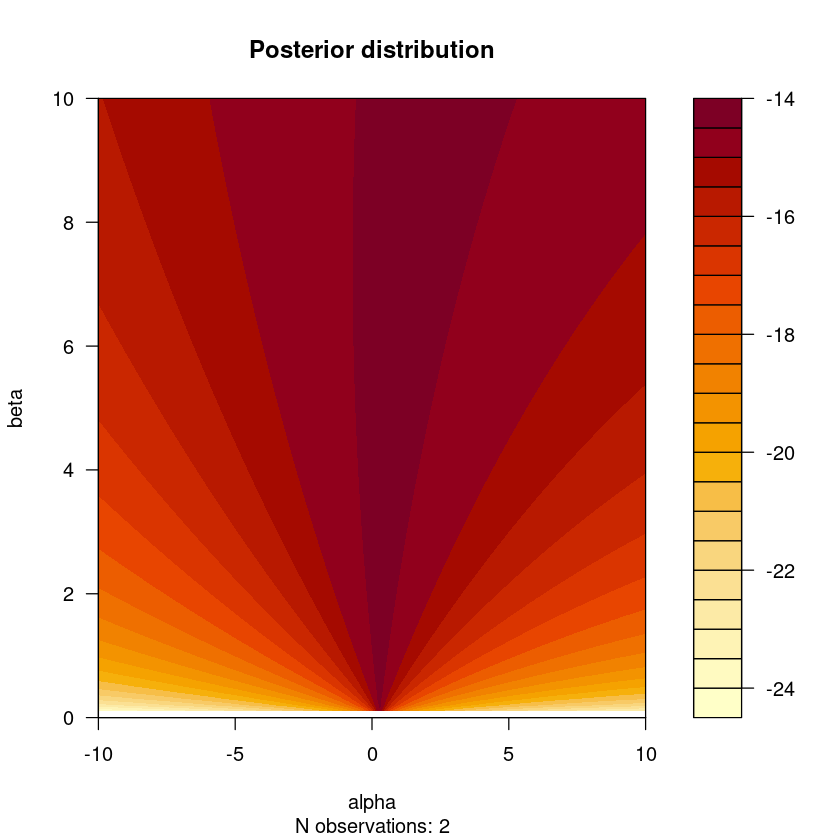

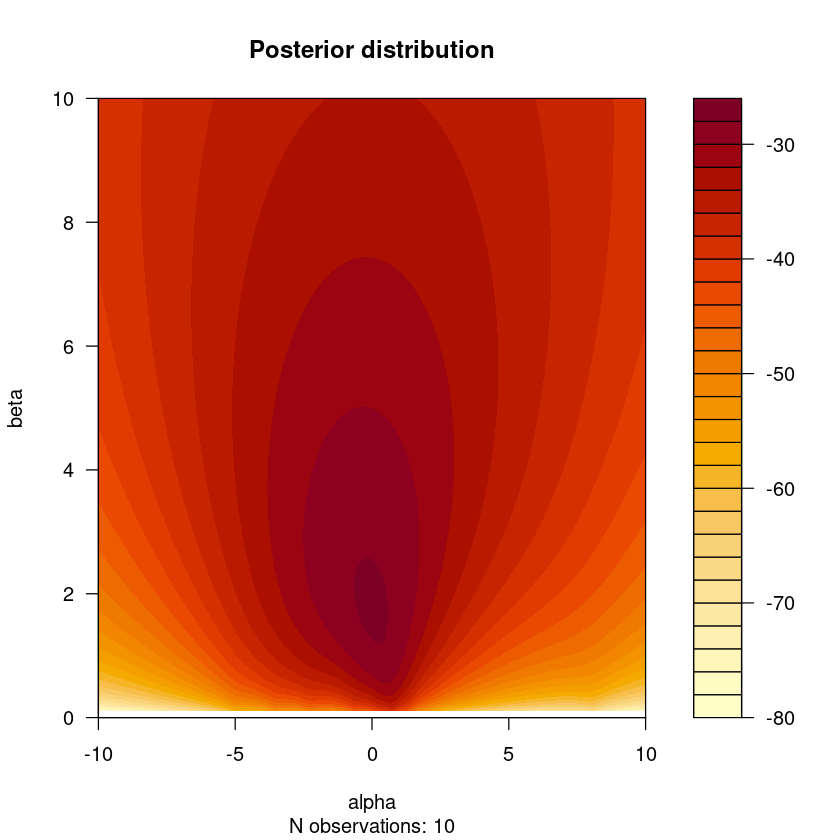

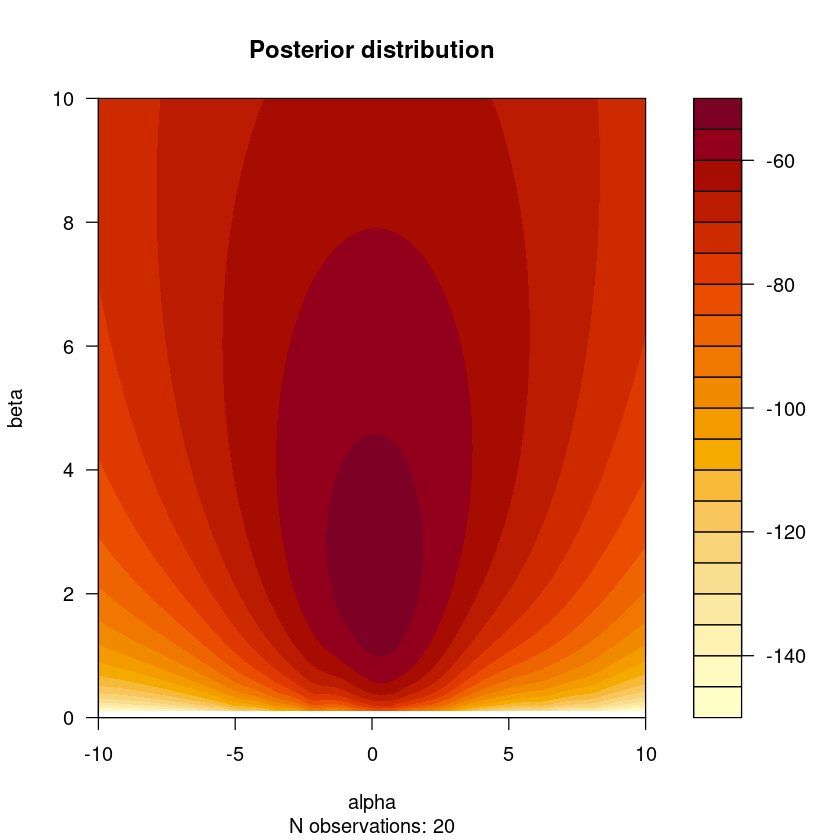

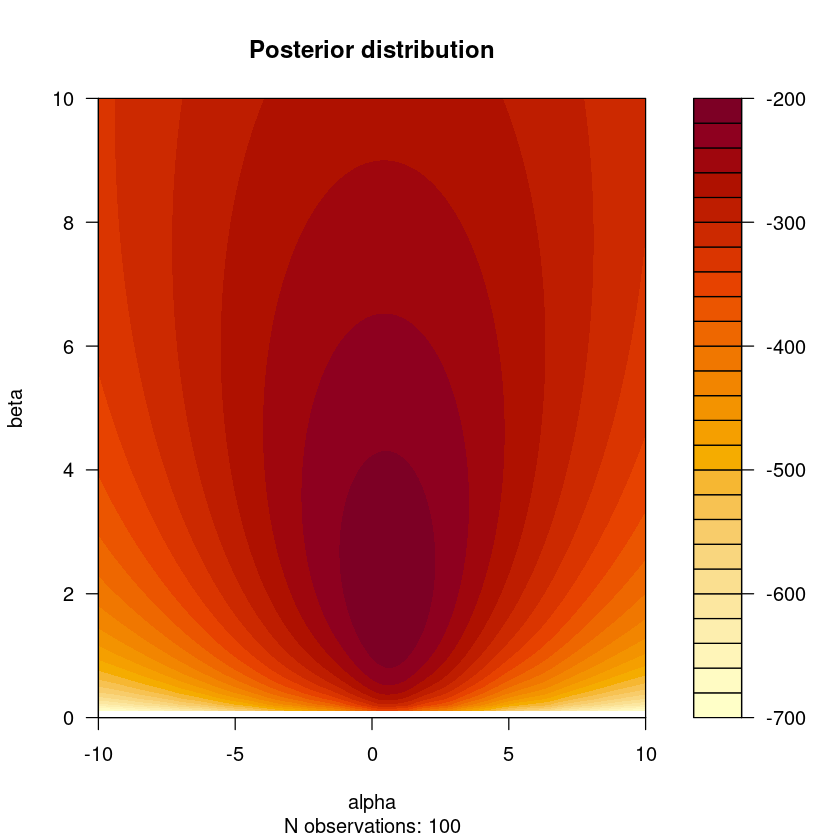

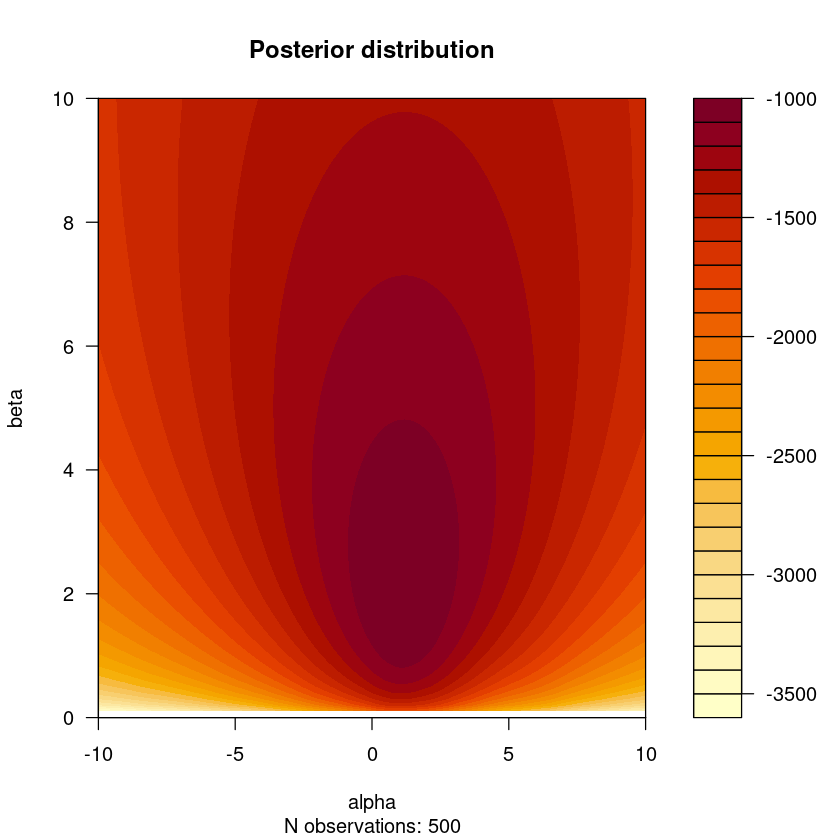

In [14]:
for (k in c(1,2,10,20,100,500)){

    zs<-matrix(,nrow=length(as),ncol=length(bs)) # one row per each alpha (will be x) and one col for each beta (will be y)

    for (i in 1:length(as)) {
        for (j in 1:length(bs)) {
            zs[i,j] <- log_posterior(as[i],bs[j],xs[1:k],amax,amin,bmax,bmin)
    }
    }
    filled.contour(x=as,y=bs,z=zs,xlab="alpha",ylab='beta',main="Posterior distribution",sub=sprintf("N observations: %s",k))

}


### Exercise 3

Given the Signal over Background example discussed last week, analyze and discuss the following cases:

#### a) vary the sampling resolution used to generate data, keeping the same sampling rate
`xdat <- seq(from=-7*w,to=7*w,by=0.5*w)`
- change the resolution `w`
- Check the effects on the results

First let's recall the problem: we want to estimate the signal $A$ and noise $B$ amplitudes along some binned energy or wavelength spectrum, where the expected number of observed photons in the bin $k$ for a signal peaked at $x_0$ is

$$
S_k = \Delta t \left [ A \exp{(-\frac{(x_k - x_0)^2}{2w^2})}  + B\right ]
$$

where $\Delta t$ is the exposure time and $w$ is the resolution. The number of photons detected in some bin follows the Poisson distribution, so the likelihood of the data $D= \{ N_j  \}$ is 

$$
P(D|A,B,M) = \prod_j \frac{S_j^{N_j}e^{-S_j}}{N_j !}
$$

Of the 5 parameters that determine the model, we assume $x_0,w,\Delta t$ to be known and only need to estimate $A$ and $B$.
If we assume a minimalistic prior, that is only assume that $A$ and $B$ are positive, the log-posterior becomes:

$$
L = \log{P(A,B|D,M)}= \log{\frac{1}{Z} \prod_j \frac{S_j^{N_j}e^{-S_j}}{N_j !}} = const + \sum_j \left [ N_j \log{S_j} - S_j\right ]
$$

where the constant term absorbed all the terms that do not depend on $A$ or $B$. If we can compute this distribution, we can assume the best values of $A$ and $B$ to be the maximing coordinates of $L$.

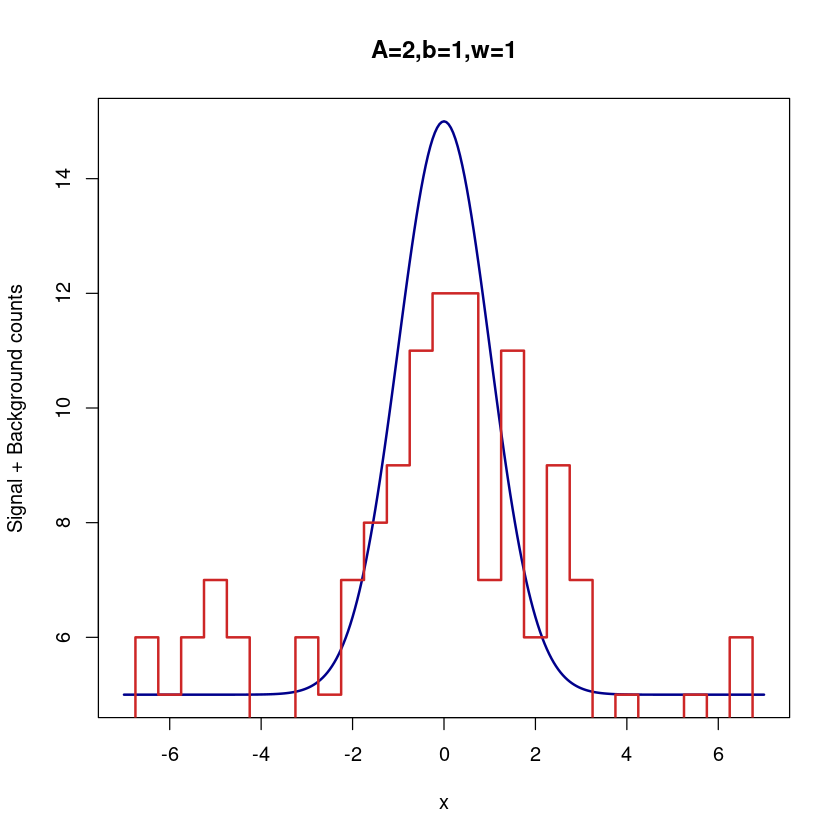

In [15]:
# expected number of photons
signal <- function (x, a, b, x0, w, t) {

    return(t * (a*exp (-(x-x0)^2/(2*w^2)) + b)    )
}

# define parameters
x0 <- 0 # peak
w <-1 # width
A.true <- 2 # signal amplitude
B.true <- 1 # background amplitude
Delta.t <- 5 # exposure time

# sampling
set.seed(1234)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w) # define the bins
s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t) # calculate the expected number of photons for each bin
ddat <- rpois( length (s.true), s.true) # sample from a poisson distribution
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) # x axis
splot <- signal (xplot , A.true , B.true , x0, w, Delta.t) # true signal
plot(xplot , splot ,
xlab="x", ylab="Signal + Background counts",type='l',lwd=2,col="darkblue",main="A=2,b=1,w=1")

xdat.off <- xdat - 0.25
lines(xdat.off , ddat , type='s',col='firebrick 3',
lwd=2,xlim=range ( xplot),ylab="",xlab="", ylim= range (c(splot , ddat )))

Let's calculate the posterior on a discrete grid for plotting:

[1] "A max:"
[1] 1.54
[1] "B max:"
[1] 0.965


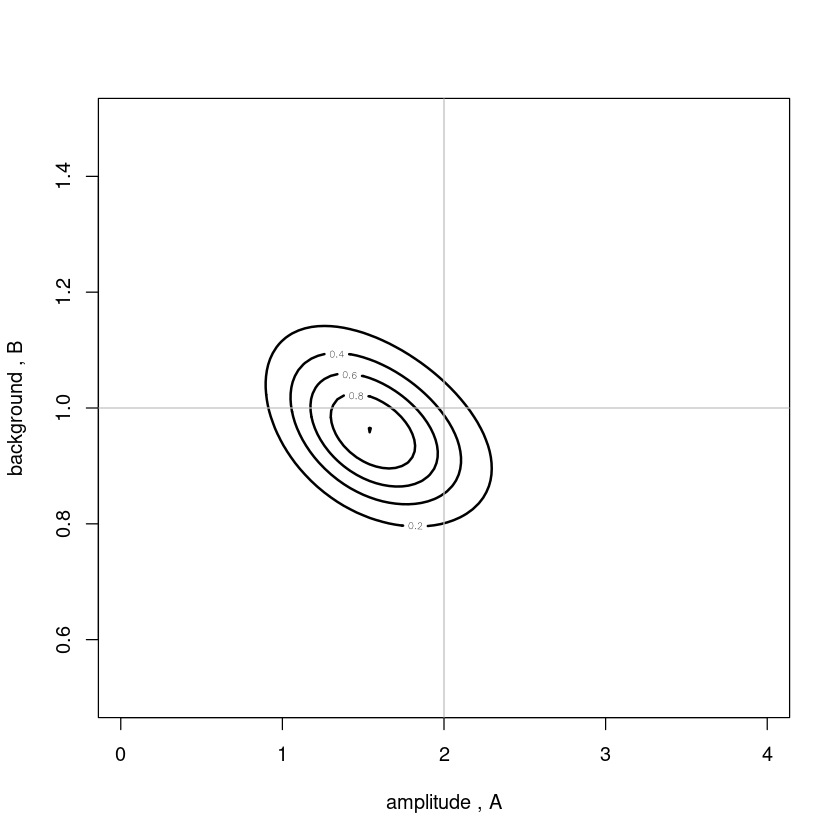

In [16]:
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2* Nsamp ),
to=1-1/(2*Nsamp), by=1/ Nsamp )
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b <0) { return (-Inf )} 
    sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}

# compute z grid of values
z <- matrix(data=NA,nrow=length(a),ncol=length(b))
for (j in 1:length(a)) {
    for (k in 1:length(b)) {
        z[j,k] <- log.post(ddat,xdat,a[j],b[k],x0,w,Delta.t)
    }
}

z <- z- max(z)

contour (a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2,
xlab="amplitude , A",
ylab="background , B")
abline (v=2,h=1,col="grey")

ind <- which(z==max(z),arr.ind=TRUE)

print("A max:")
print(a[ind[1]])

print("B max:")
print(b[ind[2]])

#### smaller w

Now let's see what happens if we scale down the resolution w: the gaussian peak will have the same height but it will just be scaled down by a factor of $w$. If we keep the sampling rate the same, by scaling down the bins by the same factor $w$, that will ultimately change nothing, as the value returned for $S_k$ will not change.

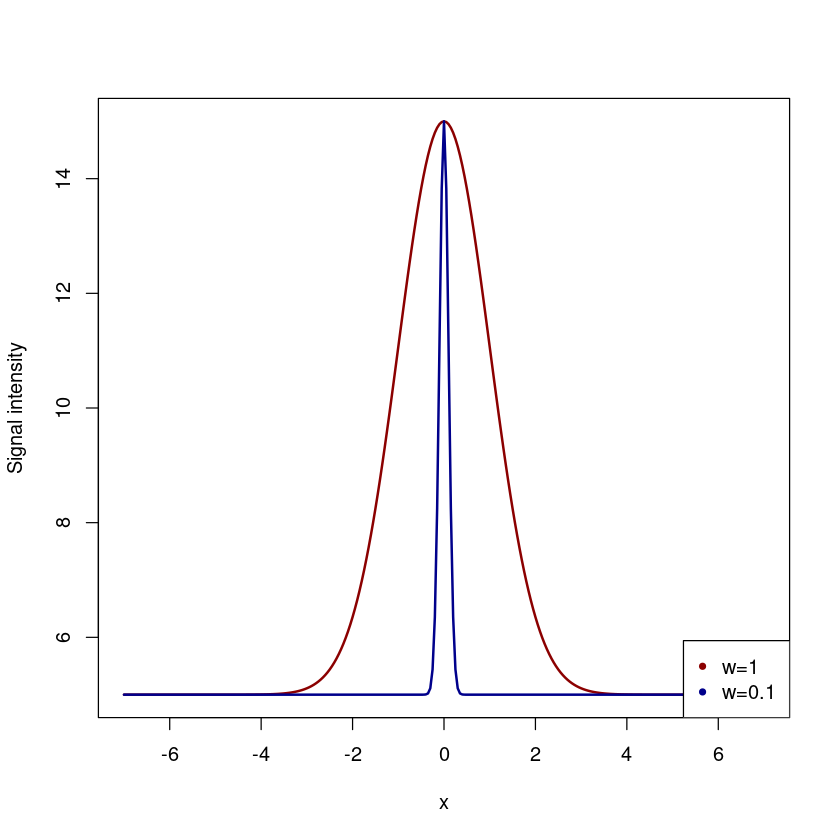

In [17]:
w <- 1
w.new <- 0.1

xdat <- seq(from=-7*w, to=7*w, by=0.5*w) # define the bins
s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t) # calculate the expected number of photons for each bin
ddat <- rpois( length (s.true), s.true) # sample from a poisson distribution

xdat.new <- seq(from=-7*w.new, to=7*w.new, by=0.5*w.new) # define the bins
s.true.new <- signal (xdat.new , A.true , B.true , x0, w.new, Delta.t) # calculate the expected number of photons for each bin
ddat.new <- rpois( length (s.true.new), s.true.new) # sample from a poisson distribution


xplot <- seq(from=min(c(  min(xdat),min(xdat.new)  ) ), to=max(c(max(xdat),max(xdat.new))), by=0.05*w) # x axis
splot <- signal (xplot , A.true , B.true , x0, w, Delta.t) # true signal
splot.new <- signal(xplot,A.true,B.true,x0,w.new,Delta.t)


plot(xplot,splot,type='l',lwd=2,col="darkred",xlab="x",ylab="Signal intensity")
lines(xplot,splot.new,lwd=2,col='darkblue')
legend("bottomright",c("w=1","w=0.1"),col=c("darkred","darkblue"),pch=20)

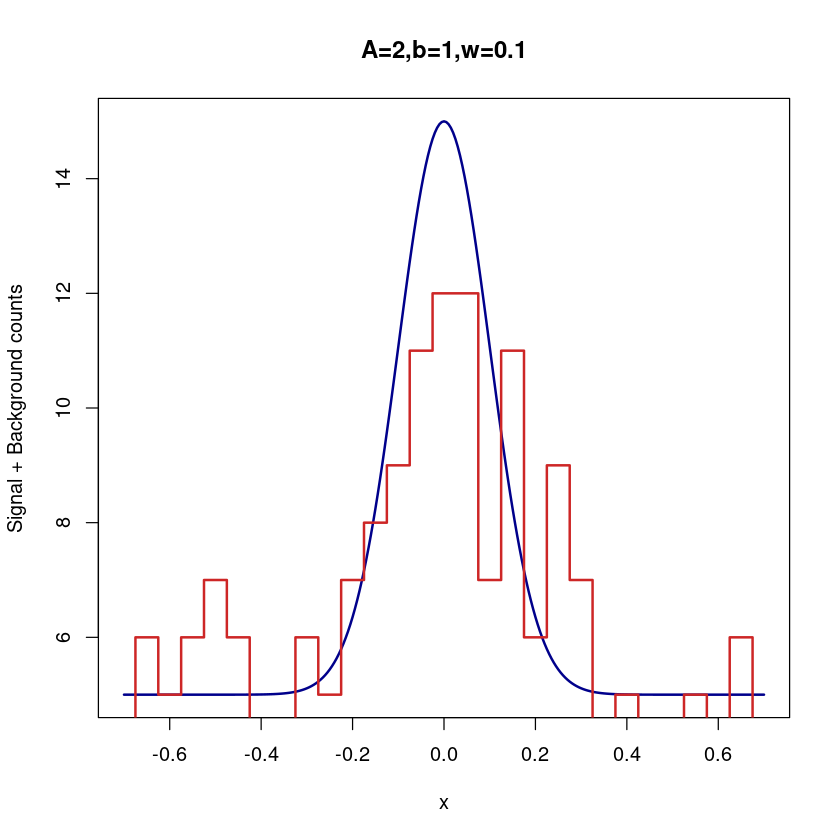

In [18]:
# sampling
set.seed(1234)
xdat.new <- seq(from=-7*w.new, to=7*w.new, by=0.5*w.new) # define the bins
s.true.new <- signal (xdat.new , A.true , B.true , x0, w.new, Delta.t) # calculate the expected number of photons for each bin
ddat.new <- rpois( length (s.true.new), s.true.new) # sample from a poisson distribution
xplot <- seq(from=min(xdat.new), to=max(xdat.new), by=0.05*w.new) # x axis
splot <- signal (xplot , A.true , B.true , x0, w.new, Delta.t) # true signal
plot(xplot , splot,
xlab="x", ylab="Signal + Background counts",type='l',lwd=2,col="darkblue",main="A=2,b=1,w=0.1")

xdat.new.off <- xdat.new - 0.25*w.new
lines(xdat.new.off , ddat.new , type='s',col='firebrick 3',
lwd=2,xlim=range ( xplot),ylab="",xlab="", ylim= range (c(splot , ddat.new )))

[1] "A max:"
[1] 1.54
[1] "B max:"
[1] 0.965


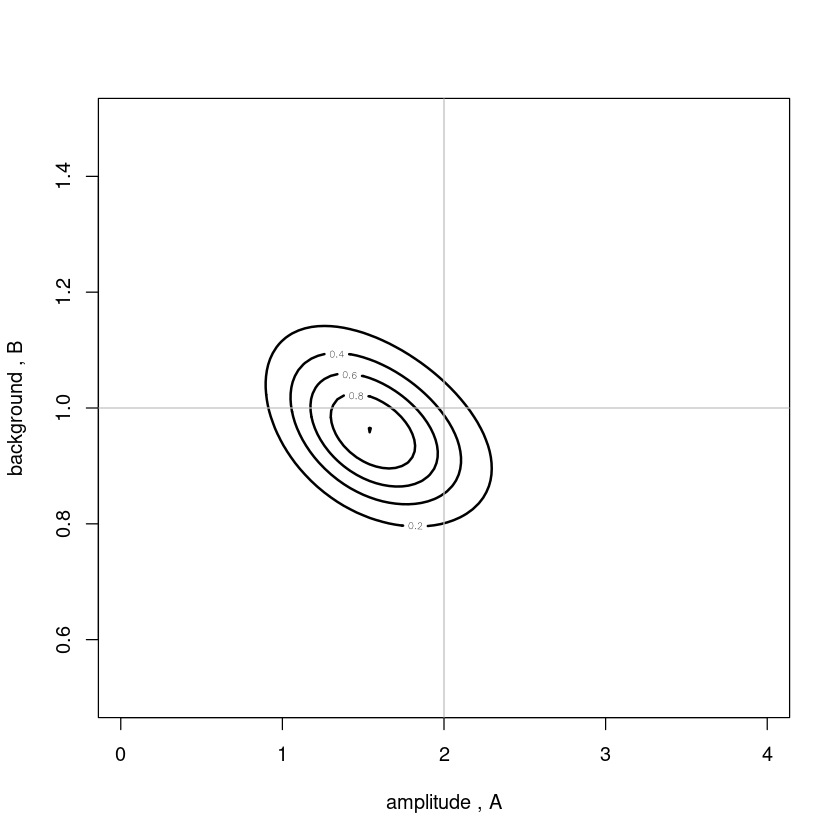

In [19]:
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2* Nsamp ),
to=1-1/(2*Nsamp), by=1/ Nsamp )
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b <0) { return (-Inf )} 
    sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}

# compute z grid of values
z <- matrix(data=NA,nrow=length(a),ncol=length(b))
for (j in 1:length(a)) {
    for (k in 1:length(b)) {
        z[j,k] <- log.post(ddat.new,xdat.new,a[j],b[k],x0,w.new,Delta.t)
    }
}

z <- z- max(z)

contour (a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2,
xlab="amplitude , A",
ylab="background , B")
abline (v=2,h=1,col="grey")

ind <- which(z==max(z),arr.ind=TRUE)

print("A max:")
print(a[ind[1]])

print("B max:")
print(b[ind[2]])

#### b) change the ratio A/B used to simulate data (keeping both positive in accordance with the prior)
- check the effects on the results

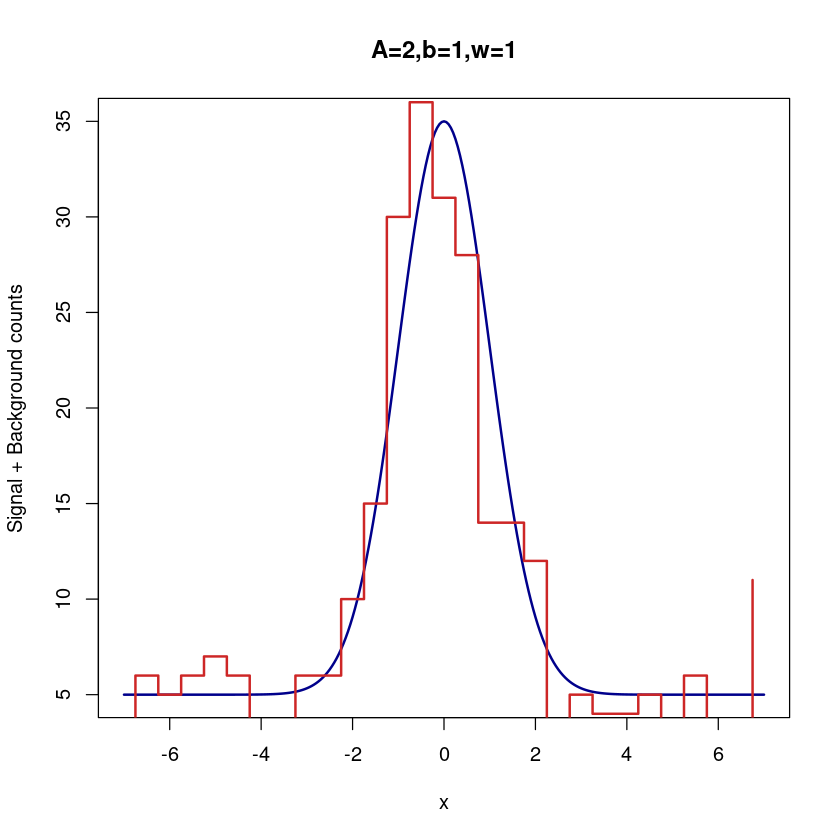

In [20]:

# define parameters
x0 <- 0 # peak
w <-1 # width
A.true <- 6 # from a 2/1 ratio to a 6/1
B.true <- 1 # background amplitude
Delta.t <- 5 # exposure time

# sampling
set.seed(1234)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w) # define the bins
s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t) # calculate the expected number of photons for each bin
ddat <- rpois( length (s.true), s.true) # sample from a poisson distribution
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) # x axis
splot <- signal (xplot , A.true , B.true , x0, w, Delta.t) # true signal
plot(xplot , splot ,
xlab="x", ylab="Signal + Background counts",type='l',lwd=2,col="darkblue",main="A=2,b=1,w=1")

xdat.off <- xdat - 0.25
lines(xdat.off , ddat , type='s',col='firebrick 3',
lwd=2,xlim=range ( xplot),ylab="",xlab="", ylim= range (c(splot , ddat )))


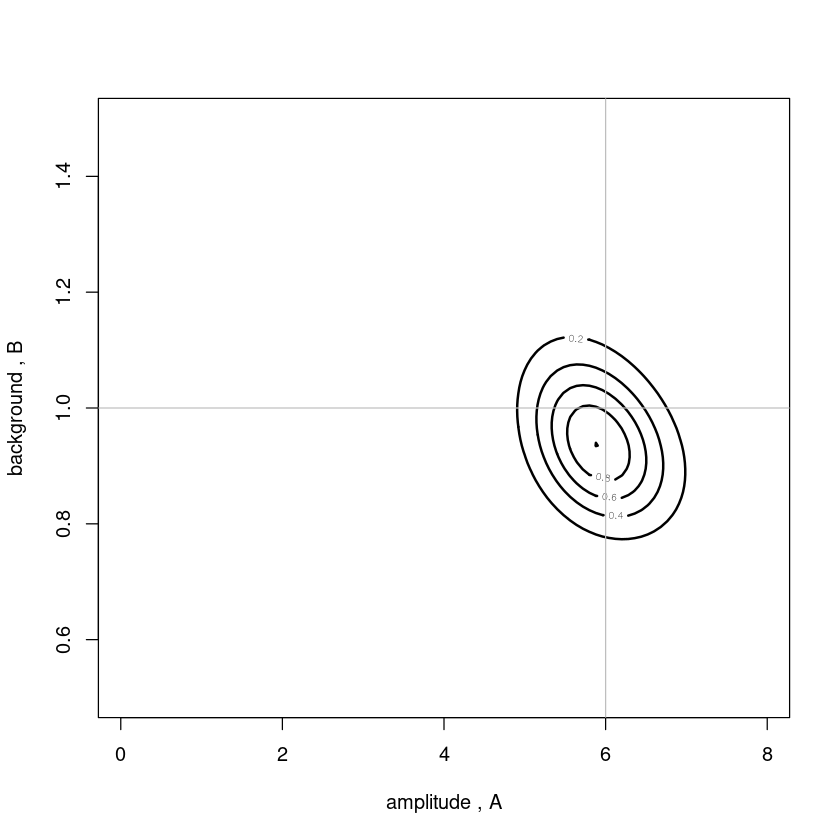

In [21]:
alim <- c(0.0, 8.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2* Nsamp ),
to=1-1/(2*Nsamp), by=1/ Nsamp )
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

# compute z grid of values
z <- matrix(data=NA,nrow=length(a),ncol=length(b))
for (j in 1:length(a)) {
    for (k in 1:length(b)) {
        z[j,k] <- log.post(ddat,xdat,a[j],b[k],x0,w,Delta.t)
    }
}

z <- z- max(z)

contour (a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2,
xlab="amplitude , A",
ylab="background , B")
abline (v=6,h=1,col="grey")